Cell bellow is for importing librarys or methods in order to complete assignment.

import numpy as np : Library for numerical computing.

import copy: Used to copy parameters without modifying orginal parameter.

import matplotlib.pyplot as plt: Plotting Library


import pandas as pd: Library for data manipulation

from math import sqrt: Imports square root math function

In [ ]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt

In [ ]:
# Reads dataset
df = pd.read_csv('D3.csv')
print(df.head())

        0.0  3.4399999999999999  0.44000000000000039  4.387545011044053
0  0.040404            0.134949             0.888485           2.679650
1  0.080808            0.829899             1.336970           2.968490
2  0.121212            1.524848             1.785455           3.254065
3  0.161616            2.219798             2.233939           3.536375
4  0.202020            2.914747             2.682424           3.815420


In [ ]:
#Intilization of X(Input) and y(Output Targets)
X = df.iloc[:, :3].values
y = df.iloc[:, 3].values

In [ ]:
# Normalization function, standardize features into range of 0 to 1
def standardize(X):
    mean = np.mean(X, axis = 0)
    std = np.sqrt((1/X.shape[0]) * np.sum((X - mean)**2, axis = 0))
    X_standardized = (X - mean) / std
    return X_standardized, mean, std

In [272]:
X_standardized, mean, std = standardize(X)

In [ ]:
# Initialize parameters w(weights) and b(bias) to zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim))
    b = 0.0
    return w, b

In [ ]:
#S et dimensions for weights and bias
dim = 3
w, b = initialize_with_zeros(dim)

In [ ]:
# Prediction and cost function
def pred_cost(w,b,X,y):
    m = X.shape[0]
    
    Z = np.dot(X,w) + b
    A = Z
    
    cost = (1/(2*m)) * np.sum((A - y)**2)
    
    return cost

In [ ]:
# Gradient computation
def compute_gradients(w, b, X, y):
    m = X.shape[0]
    
    Z = np.dot(X,w) + b
    A = Z
    
    dw = (1/m) * np.dot(X.T, (A - y))
    db = (1/m) * np.sum(A - y)
    
    return dw, db

In [ ]:
# Prediction function
def predict(w, b, X):
    return np.dot(X, w) + b

In [ ]:
# Gradient Descent algorithm
def gradient_descent(w, b, X, y, num_iterations=1000, learning_rate=0.01, print_cost=True):
    w = copy.deepcopy(w)
    b = copy.deepcopy(b)
    cost_history = []

    for i in range(num_iterations):
        dw, db = compute_gradients(w, b, X, y)

        w = w - learning_rate * dw
        b = b - learning_rate * db

        cost = pred_cost(w, b, X, y)
        cost_history.append(cost)

        if print_cost and i % 100 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return w, b, cost_history

In [ ]:
# Running Gradient Descent and printing cost every 100 iterations
w, b, cost_history = gradient_descent(w, b, X_standardized, y, num_iterations=10000, learning_rate=0.1, print_cost=True)

Cost after iteration 0: 4.560206806716216
Cost after iteration 100: 0.708187872075954
Cost after iteration 200: 0.7081878651133591
Cost after iteration 300: 0.708187865113359
Cost after iteration 400: 0.7081878651133587
Cost after iteration 500: 0.7081878651133587
Cost after iteration 600: 0.7081878651133587
Cost after iteration 700: 0.7081878651133587
Cost after iteration 800: 0.7081878651133587
Cost after iteration 900: 0.7081878651133587
Cost after iteration 1000: 0.7081878651133587
Cost after iteration 1100: 0.7081878651133587
Cost after iteration 1200: 0.7081878651133587
Cost after iteration 1300: 0.7081878651133587
Cost after iteration 1400: 0.7081878651133587
Cost after iteration 1500: 0.7081878651133587
Cost after iteration 1600: 0.7081878651133587
Cost after iteration 1700: 0.7081878651133587
Cost after iteration 1800: 0.7081878651133587
Cost after iteration 1900: 0.7081878651133587
Cost after iteration 2000: 0.7081878651133587
Cost after iteration 2100: 0.7081878651133587
Cos

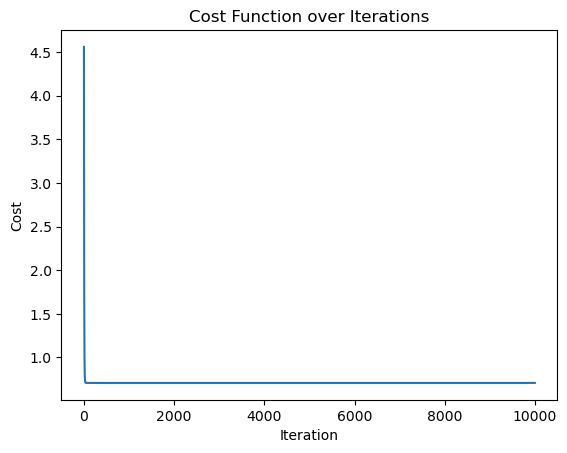

In [ ]:
# Plotting the cost function over iterations
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function over Iterations')
plt.show()

In [ ]:
# Making predictions on new test cases
test_cases = np.array([[1, 1, 1], [2, 0, 4], [3, 2, 1]])

test_cases_standardized = (test_cases - mean) / std

predictions = predict(w, b, test_cases_standardized)

print("Predictions:", predictions.flatten())

Predictions: [3.64081089 0.1611724  0.11797162]
